In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score,
                              classification_report, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import cross_val_score



In [2]:
# balanced training data
train_data = pd.read_csv('balanced_training_data_2.csv')
# test data
test_data = pd.read_csv('test_data_2.csv')

In [3]:
train_data.head(1)

,CURRENT_JOB_YRS,Income,Age,CURRENT_HOUSE_YRS,Income_Per_Age,Job_House_Stability,House_Ownership_owned,House_Ownership_rented,STATE_Assam,STATE_Bihar,...,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal,Risk_Flag
0,3,9121364,70,11,128469.915493,0.25,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
train_data['Risk_Flag'].value_counts()   # After applying SMOTE the data was balanced.

Risk_Flag
0    176857
1    176857
Name: count, dtype: int64

In [5]:
test_data.shape

(50400, 37)

# seperate features and target variable

In [6]:
# Training data
X_train = train_data.drop(columns=['Risk_Flag'])
y_train = train_data['Risk_Flag']

In [7]:
# testing data
X_test = test_data.drop(columns=['Risk_Flag'])
y_test = test_data['Risk_Flag']

# RandomForest classifier

In [35]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=5,max_depth=None)

In [36]:
# train the model on the training set
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

# Predictions

In [37]:
# predict on the test set
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
y_proba = rf_model.predict_proba(X_test)[:, 1] # Probabilites for the positivve class
y_proba

array([0.        , 0.        , 0.        , ..., 0.90327203, 0.        ,
       0.        ])

# Model Evaluation

In [39]:
# evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Model Evaluation Metrics:
Accuracy: 0.88
Precision: 0.52
Recall: 0.80
F1 Score: 0.63
ROC-AUC Score: 0.91


#### The model's evaluation metrics indicate solid performance. It achieved an **accuracy of 0.88**, correctly predicting 88% of cases. With a **precision of 0.52**, there is some scope for improvement in the accuracy of positive predictions. However, the **recall of 0.80** shows the model does well in identifying actual positives. The **F1 score of 0.63** reflects a reasonable balance between precision and recall. The **ROC-AUC score of 0.91** demonstrates strong ability in distinguishing between classes, which I find impressive.

# Confusion Matrix

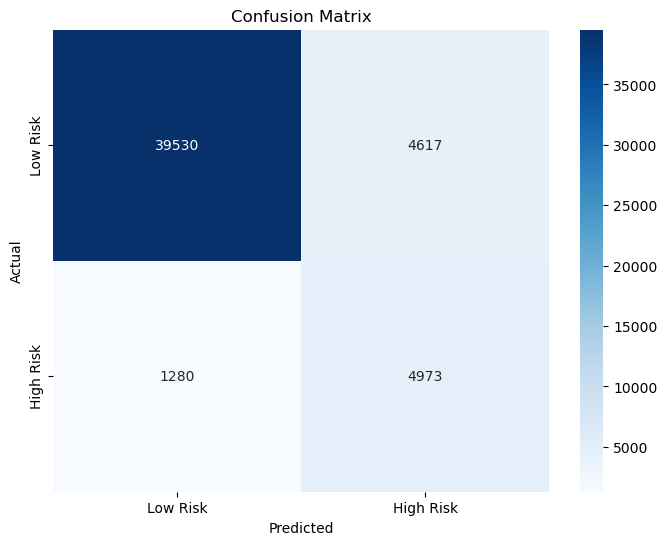

In [40]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


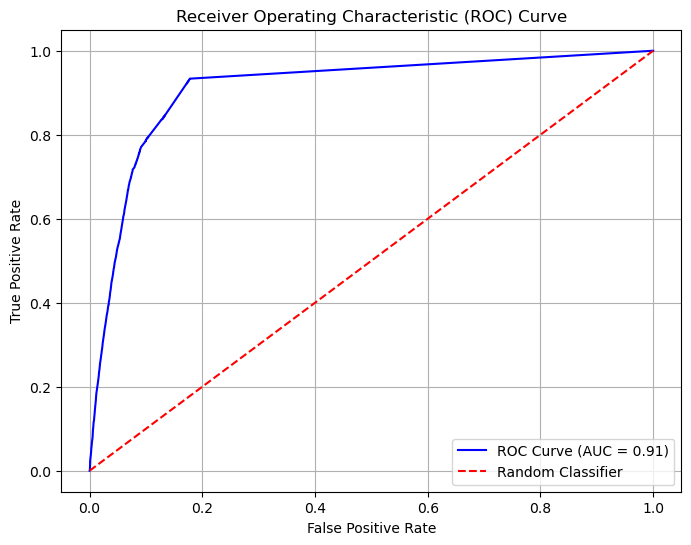

In [41]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


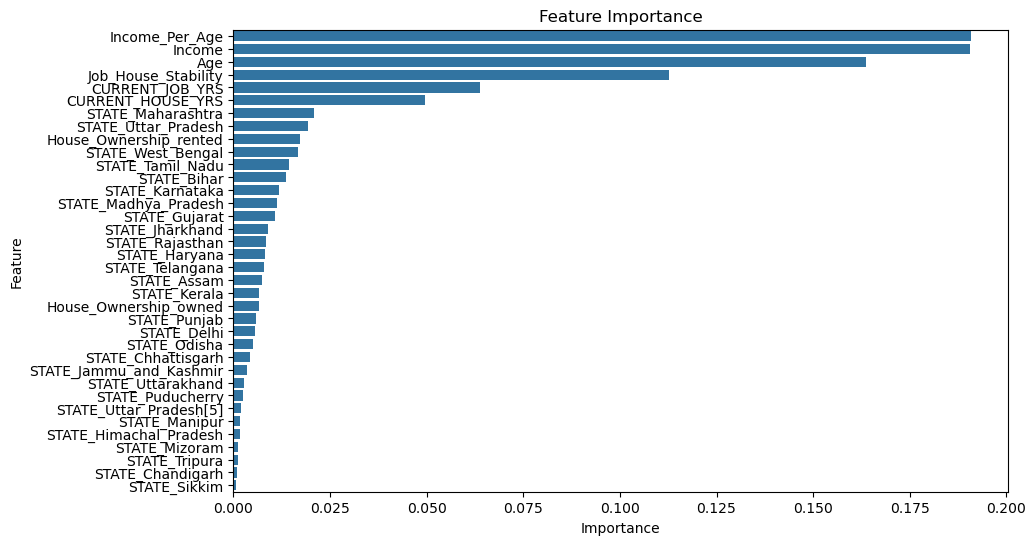

In [42]:
# Extract feature importance
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [43]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

# Print cross-validation scores
print(f"Cross-Validation ROC-AUC Scores: {cv_scores}")
print(f"Mean CV ROC-AUC Score: {cv_scores.mean():.2f}")


Cross-Validation ROC-AUC Scores: [0.9211762  0.97125293 0.96891005 0.96959216 0.97017583]
Mean CV ROC-AUC Score: 0.96
